## A Datset Given By The Sponsor Of Retail Store Has Been Used For The Study

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/sushmakarjol/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#importing dataset
UrabanValue_Stores = pd.read_csv("/Users/sushmakarjol/Documents/MPS Analytics/Quarter 5/ALY6980/df_all_cleaned.csv", low_memory=False)
#("/Users/sushmakarjol/Documents/MPS Analytics/Quarter 2/6020 Predictive Analytics/BankLoansDataset.xlsx")

In [5]:
# Understanding the variables
UrabanValue_Stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322590 entries, 0 to 322589
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product group   322590 non-null  object 
 1   UPC code        322590 non-null  object 
 2   Customer        322590 non-null  object 
 3   Location        322590 non-null  object 
 4   Number          322590 non-null  object 
 5   Date            322590 non-null  object 
 6   Payment type    322590 non-null  object 
 7   Item name       322590 non-null  object 
 8   Net price       322590 non-null  float64
 9   Customer group  322590 non-null  object 
dtypes: float64(1), object(9)
memory usage: 24.6+ MB


In [6]:
# Assigning the name
data = UrabanValue_Stores

In [7]:
# Overview of Dataset
data.head()

,Product group,UPC code,Customer,Location,Number,Date,Payment type,Item name,Net price,Customer group
0,Juice,82592660152,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Naked Juice Mighty Mango 15.2 OZ,3.99,Default group
1,Pastry,35751118322,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Bon Appetit Donuts Celebration 3.5 OZ,2.99,Default group
2,Energy,8.89392E+11,"POS Customer,",Legacy West 003,104000003,7/1/22,by card,Celsius Sparkling Tropical Vibe 12 OZ,2.99,Default group
3,Water,22592431147,"POS Customer,",Legacy West 003,104000004,7/1/22,by card,Ozarka Spring Water Sport Cap 700mL,1.79,Default group
4,Energy,6.11269E+11,"POS Customer,",Legacy West 003,104000005,7/1/22,by card,Red Bull Watermelon 8.4 OZ,2.99,Default group


In [8]:
# Describing the data
data.describe()


,Net price
count,322590.000000
mean,4.105575
std,3.640559
min,-0.190000
25%,2.390000
50%,2.990000
75%,3.990000
max,400.000000


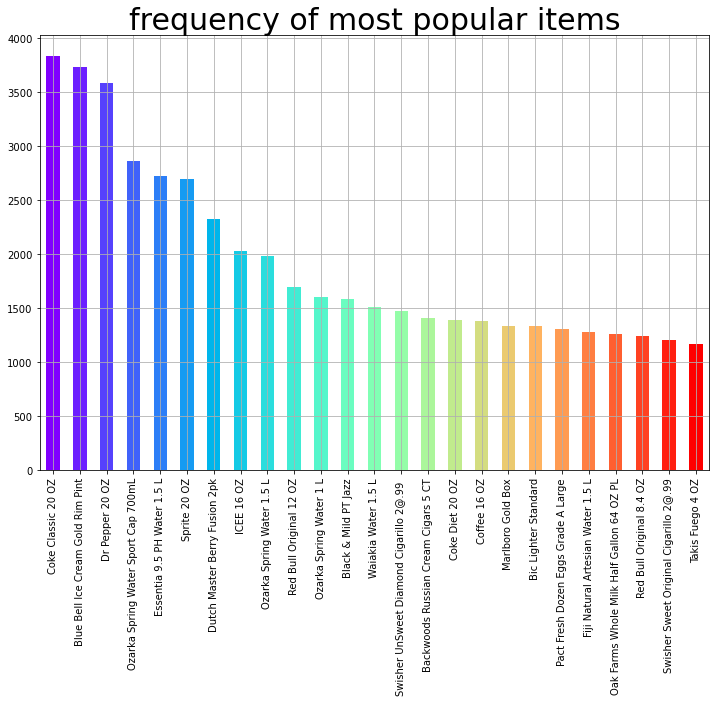

In [11]:
# Visualizing the data to see the most frequently bought items at the Stores
color = plt.cm.rainbow(np.linspace(0, 1, 25))
#for col in data.columns:
data['Item name'].value_counts().head(25).plot.bar(color = color, figsize=(12,8))
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

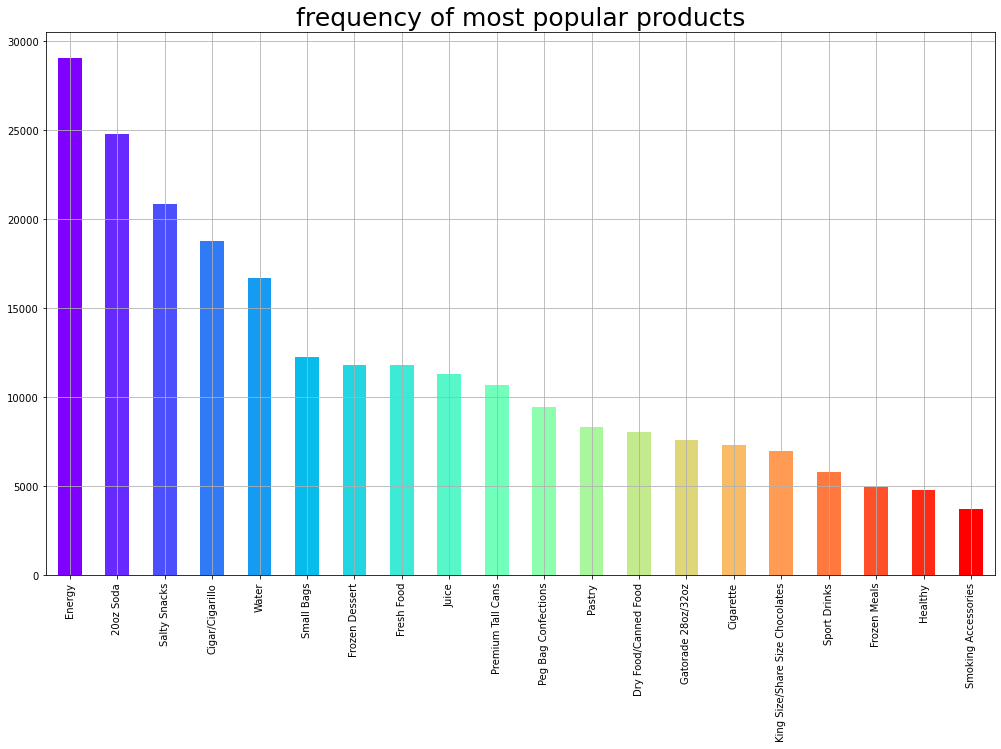

In [9]:
#To Check the most frequently bought product-categories at the Stores
color = plt.cm.rainbow(np.linspace(0, 1, 20))
#for col in data.columns:
data['Product group'].value_counts().head(20).plot.bar(color = color, figsize=(17,10))
plt.title('frequency of most popular products', fontsize = 25)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

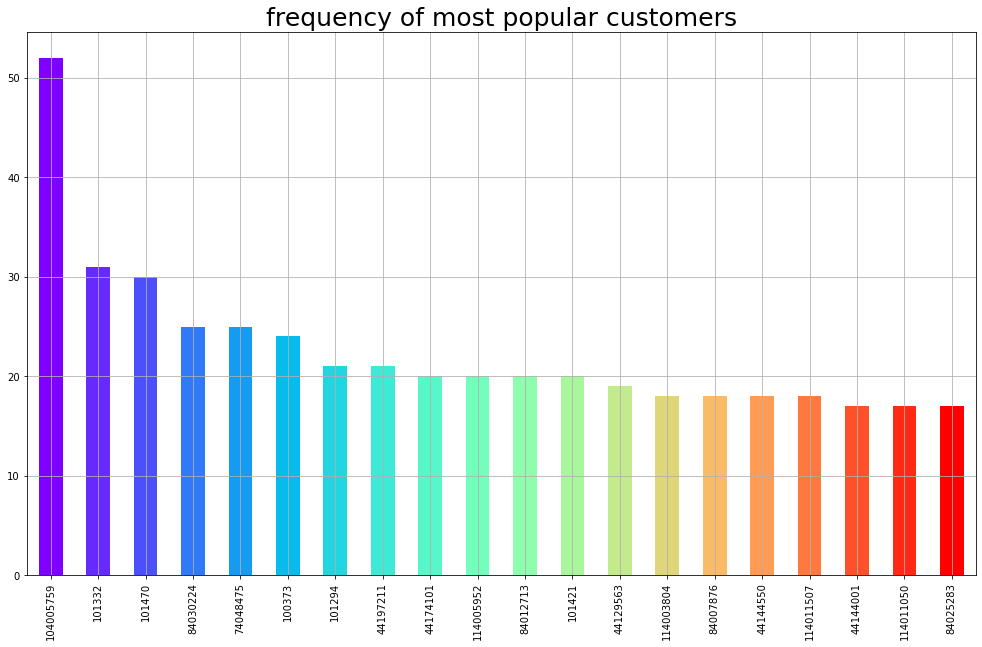

In [23]:
# Most frequent Visitors at the stores using the Transaction numbers
color = plt.cm.rainbow(np.linspace(0, 1, 20))
#for col in data.columns:
data['Number'].value_counts().head(20).plot.bar(color = color, figsize=(17,10))
plt.title('frequency of most popular customers', fontsize = 25)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [13]:
# Adding new data column-  combining transaction number and date 
data['single_transaction'] = data['Number'].astype(str)+'_'+data['Date'].astype(str)

data.head()

,Product group,UPC code,Customer,Location,Number,Date,Payment type,Item name,Net price,Customer group,single_transaction
0,Juice,82592660152,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Naked Juice Mighty Mango 15.2 OZ,3.99,Default group,104000002_7/1/22
1,Pastry,35751118322,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Bon Appetit Donuts Celebration 3.5 OZ,2.99,Default group,104000002_7/1/22
2,Energy,8.89392E+11,"POS Customer,",Legacy West 003,104000003,7/1/22,by card,Celsius Sparkling Tropical Vibe 12 OZ,2.99,Default group,104000003_7/1/22
3,Water,22592431147,"POS Customer,",Legacy West 003,104000004,7/1/22,by card,Ozarka Spring Water Sport Cap 700mL,1.79,Default group,104000004_7/1/22
4,Energy,6.11269E+11,"POS Customer,",Legacy West 003,104000005,7/1/22,by card,Red Bull Watermelon 8.4 OZ,2.99,Default group,104000005_7/1/22


In [14]:
#data=data.drop(["quantity"],axis=1)
data

,Product group,UPC code,Customer,Location,Number,Date,Payment type,Item name,Net price,Customer group,single_transaction
0,Juice,82592660152,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Naked Juice Mighty Mango 15.2 OZ,3.99,Default group,104000002_7/1/22
1,Pastry,35751118322,"POS Customer,",Legacy West 003,104000002,7/1/22,by card,Bon Appetit Donuts Celebration 3.5 OZ,2.99,Default group,104000002_7/1/22
2,Energy,8.89392E+11,"POS Customer,",Legacy West 003,104000003,7/1/22,by card,Celsius Sparkling Tropical Vibe 12 OZ,2.99,Default group,104000003_7/1/22
3,Water,22592431147,"POS Customer,",Legacy West 003,104000004,7/1/22,by card,Ozarka Spring Water Sport Cap 700mL,1.79,Default group,104000004_7/1/22
4,Energy,6.11269E+11,"POS Customer,",Legacy West 003,104000005,7/1/22,by card,Red Bull Watermelon 8.4 OZ,2.99,Default group,104000005_7/1/22
...,...,...,...,...,...,...,...,...,...,...,...
322585,Large Bags,28400516914,"Young, Ebony",Parkside 001,44198565,12/22/22,by card,Ruffles Cheddar & Sour Cream 8 OZ,6.19,Default group,44198565_12/22/22
322586,Small Bags,28400357753,"Young, Ebony",Parkside 001,44198565,12/22/22,by card,Smartfood White Cheddar 1.75 OZ,2.59,Default group,44198565_12/22/22
322587,Pastry,24300865954,"Young, Ebony",Parkside 001,44198565,12/22/22,by card,Little Debbie Zebra Cake 3 OZ,2.99,Default group,44198565_12/22/22
322588,King Size/Share Size Chocolates,4026305,"Young, Ebony",Parkside 001,44198565,12/22/22,by card,Snickers Original King Size 3.29 OZ,2.99,Default group,44198565_12/22/22


In [15]:
quantity=[]
quantity.append(data.groupby('single_transaction')['Item name'].count())
quantity[0]

In [16]:
test = data[data['Item name'] == 'Little Debbie Zebra Cake 3 OZ' ]

In [17]:
test.shape

(264, 11)

In [18]:
# Calculating the quantity of each item bought
quantity = data.groupby('Item name')['UPC code'].count().reset_index(name = 'count_of_Item_sold')
quantity

,Item name,count_of_Item_sold
0,*Fresh & Ready Pasta Mike's Tuna Mac 9.5 OZ,1
1,*Fresh & Ready Turkey & Cheese Sub Sandwich 9....,2
2,1.5 QT BAKE DISH KITCHEN CLASSICS,1
3,10 Foot iPhone Charging Cable Assorted,1
4,100% Pure Avocado Oil Spray 4.7 OZ,1
...,...,...
3937,"Zig Zag 6pk Cones 1 1/4""",677
3938,Ziploc Gallon Storage Bags 19 CT,6
3939,Zyrtec Allergy 3 Tabs,38
3940,ZzzQuil Sleep Aid 12 CT,1


In [38]:
# list of least quantity of itmes sold that can be replaced with moving products.
quantity.sort_values(by = "count_of_Item_sold").head(25)

,Item name,count_of_Item_sold
0,*Fresh & Ready Pasta Mike's Tuna Mac 9.5 OZ,1
1941,Kraft Zesty Italian Dressing Lite 16 OZ,1
1950,LA CASITA CALIENTE SALSA,1
1956,LED Dog Leash,1
302,Bertolli Frozen Meal Shrimp Scampi & Linguini ...,1
1963,LUVS Size 3 Diapers 24 CT,1
1964,LUVS Size 5 Diapers 19 CT,1
3940,ZzzQuil Sleep Aid 12 CT,1
2002,LavAzza Espresso Italiano 35.2oz,1
2037,Lays Limon 7 3/4 OZ,1


In [22]:
# Apriori algorithm to bring down the association rules.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(King Size/Share Size Chocolates),(20oz Soda),0.039769,0.142148,0.010253,0.257799,1.813596,0.004599,1.155822
1,(20oz Soda),(King Size/Share Size Chocolates),0.142148,0.039769,0.010253,0.072126,1.813596,0.004599,1.034871
2,(Peg Bag Confections),(20oz Soda),0.053324,0.142148,0.011580,0.217163,1.527722,0.004000,1.095824
3,(20oz Soda),(Peg Bag Confections),0.142148,0.053324,0.011580,0.081464,1.527722,0.004000,1.030636
4,(Salty Snacks),(20oz Soda),0.114906,0.142148,0.021339,0.185708,1.306437,0.005005,1.053494


In [24]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Salty Snacks),(20oz Soda),0.114906,0.142148,0.021339,0.185708,1.306437,0.005005,1.053494
5,(20oz Soda),(Salty Snacks),0.142148,0.114906,0.021339,0.150117,1.306437,0.005005,1.041431
6,(Small Bags),(20oz Soda),0.071948,0.142148,0.017577,0.244298,1.718616,0.007349,1.135172
7,(20oz Soda),(Small Bags),0.142148,0.071948,0.017577,0.123651,1.718616,0.007349,1.058998
8,(Water),(Energy),0.104840,0.163821,0.015195,0.144939,0.884740,-0.001980,0.977917
9,(Energy),(Water),0.163821,0.104840,0.015195,0.092756,0.884740,-0.001980,0.986681
14,(Water),(Salty Snacks),0.104840,0.114906,0.012307,0.117389,1.021608,0.000260,1.002813
15,(Salty Snacks),(Water),0.114906,0.104840,0.012307,0.107106,1.021608,0.000260,1.002537
12,(Small Bags),(Salty Snacks),0.071948,0.114906,0.011974,0.166419,1.448311,0.003706,1.061798
13,(Salty Snacks),(Small Bags),0.114906,0.071948,0.011974,0.104203,1.448311,0.003706,1.036007


### Insights

Customers who buy Salty Snacks will also buy 20Oz Soda.
And Customres who have bought 20Oz Soda have also purchased Small Bags.
Items that can inclded in a basket and used for promotion are Salty Snacks,20oz Soda/Water/Energy drink,Fresh Food, Choclates and Small Bags